# MAST30034 Project 2 
# Summary Notebook

## Introduction

Data science plays a vital role in the real estate industry and can improve the accuracy of the decision-making process by analysing economic trends to predict property performance. The objective of this project is to use big data techniques to identify the key features that influence residential property rents in Victoria, predict rental prices, and assess the most liveable and affordable suburbs. The paper provides an in-depth analysis of rental prices in Melbourne's suburbs, highlighting the importance of a property's internal characteristics (such as the number of bathrooms and type of property) as well as external amenities (such as shopping centres, schools, parks, and train station). Based on authoritative datasets, machine learning models such as Random Forest and Gradient Boosting were used to predict future rental trends, as assessed by livability and affordability indicators. Key findings include the critical role of socio-economic indicators and geographic proximity in predicting rental prices, as well as a detailed assessment of Melbourne's suburbs with the highest growth rates and livability scores. This notebook will summarise the project's key findings and discuss in depth the results of the application and analysis of these data.

### Internal Features:

1. Number of bathrooms (`num_bath`)
2. Property type (`type`)
3. Land size (`landSize`)
4. Presence of video (`hasVideo`)
5. formatted house


### External Features:

1.	Shopping mall
2.	Schools (primary school, secondary school and university)
3.	Park
4.	Medical institutions(hospital)
5.	Train Stations
6.	Population
7.	IEO Score
8.	IER Score


All external data is obtained or downloaded from authoritative or official websites:

https://www.abs.gov.au/

https://services6.arcgis.com/GB33F62SbDxJjwEL/ArcGIS/rest/services/Vicmap_Features_of_Interest/FeatureServer

https://data.humdata.org/dataset/hotosm_aus_health_facilities

https://discover.data.vic.gov.au/dataset/ptv-metro-train-stations

https://www.abs.gov.au/statistics/people/people-and-communities/socio-economic-indexes-areas-seifa-australia/latest-release#index-of-economic-resources-ier-

https://www.abs.gov.au/statistics/people/population/regional-population/latest-release


## Reasons why we choose IER and IEO and Population density to predict rental price.

 (1). Through the population DEA session, we found that the highest population density is Melbourne CBD in 2023. Due to the supply and demand relationship, higher population density would lead to a higher rental demand. Then, the rental price of Melbourne CBD is significantly higher than other suburbs. However, when we checked the median income of Melbourne CBD income to find any possibility to predict rental price, the Melbourne CBD’s median income is significantly lower than other suburb’s. This might be caused by many international students choose to live in CBD area. Due to the government policy, they only have maximum 20 hours to work per week or part of them with no jobs. Therefore, under this situation, we found that it is inaccurate to use median income to predict rental health.
Based on (1), we find other more accurate variables to predict affluence.


#### A. The index of education and occupation (IEO Score)

(2). Emmons, W. R., & Ricketts, L. R. (2016) has point out Education level and daily necessities will impact the affluence. Therefore, firstly we find the external dataset about the index of education and occupation (IEO) from ABS. The higher scores in IEO means that people in this area with relatively higher education level and occupational level in Victoria state. IEO is also recommended to be used to understand the (a). education and occupation variables (b). relationship between income, education, and employment.

#### B. The Index of Economic Resources (IER Score)

(3). IER focuses on the financial aspects of relative socio-economic advantage and disadvantage, by summarizing variables related to family income and housing cost. It contains about . IER doesn’t contain the information in IEO score. High IER score means that the area may have more high-income residents, or more people are able to pay higher home loans or rents, reflecting better economic resources.

## Reasons why we choose these facilities

We have chosen 7 main places as the features we interested in VIC, which may have highly relevance of the rental price. We referred to the content provided on the https://auo.org.au/wp-content/uploads/2020/03/AUO_Scorecard_Melbourne.pdf to help us predict rental prices and evaluate the top suburb locations by focusing on the following locations and aspects, thus answering the three main questions.

## Livability：

Public transport -- railway station

Education – primary school, secondary school, university

shops and services -- shopping mall, hospital

public open space -- park



We calculated the nearest driving distance to the facilities (except the hospital) and the walking distance to the nearest railway station for each property.

The distance to the nearest hospital (medical institutions) is not calculated because it includes many different types of medical clinics (hospitals, counselors, dental clinics, physical exams, etc.), and this distance does not indicate that it will affect rent. Thus, for medical institutions we did a count based on postcode and used that as a feature to see its affect.


## Affordability:

price -- rental price of property

IER Score -- economic resources

## Data Pre-process and outlier detection:

There are numerous classification criteria for dataset such as SA2 and postcode. We take postcode as our criteria to combine data together. Besides, as data amount for suburb of Melbourne 3000 is overwhelming than other suburbs, we decided to rescale a sample size of 30% for Melbourne 3000 dataset with random pick. For outlier detection, we using regex extract all numbers in price into float. From home Victoria data on 2023 July to September, the range is from 170pw to 2400pw, rent not in this range would be removed.

## Feature Importance / The most important internal and external features in predicting rental prices

After gathering all the necessary internal and external data, the first issue we addressed was identifying the key factors in predicting rental prices.

To tackle this, we calculated the permutation feature importance and ranked the features accordingly. The resulting graph highlights that the top three factors influencing rental prices are number of bathroom, IEO sccore and type of house, which all have a siginificant superiority among top ten feature. These features will play a central role in our subsequent models.

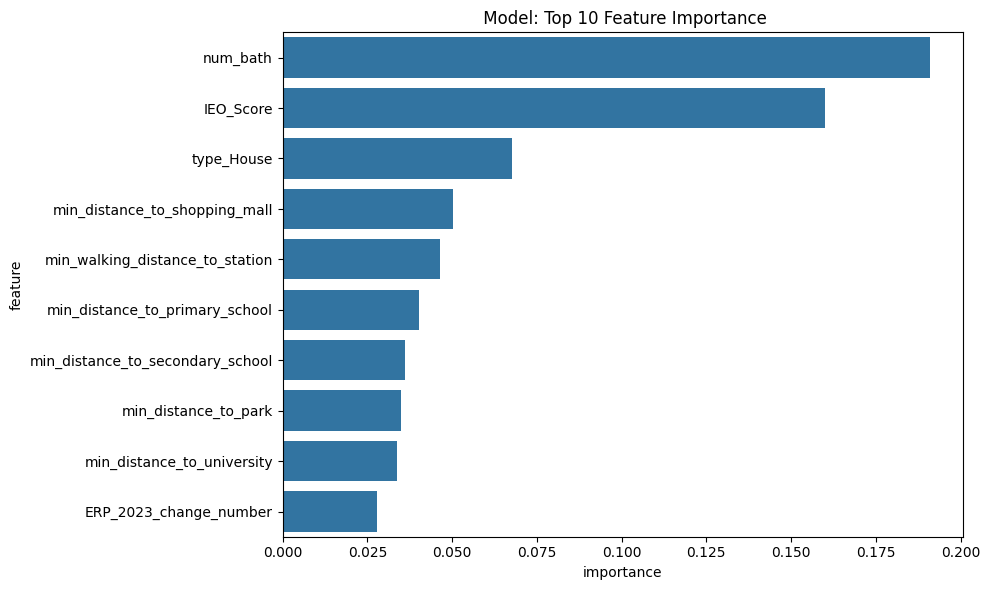

In [28]:
from PIL import Image

featureimportance = Image.open('../plots/feature importance.png')

featureimportance


# Models

We use MSE and R squared to evaluate performance between models. MSE measures the average squared difference between the actual values and the predicted values. A lower MSE value indicates better model performance, as it means the predicted values are closer to the actual values. On the other hand, R squared measures the proportion of the variance in the dependent (target) variable that is predictable from the independent variables. 

Therefore, R squared measure how well the model fit and a higher R squared value represent the models explain more variance of model. From both sides, random forest regression performs better than others. It has lower MSE and higher R Squared value. We use Random Forest Regression to predict next three years’ growth rate and rent. Dataset has been split by 20% for test and 80% for training. A regression model defines a function that explains the relationship between one or more input variables and a target variable. Random Forest Regression is not likely to be overfitted and usually has high accuracy. Besides, it is good for handling high dimension data.

From predicted versus actual graph, most points lie close to the diagonal line. It indicates that the predicted values are very similar to actual values. However, we can still see that some values especially those with high rent lie very far from diagonal line. This indicates that outliers may still exist or maybe model is not capturing the underlying relationship between the target variables and input features. This may be training size is too small for those property with high prices.

For residual plot, we can see that most points are very close to 0 line, those points with higher prices usually line very far from 0 line and this may prove the assumption we made before. Besides, the overall points distributed randomly around 0 line. Random scatter means constant variance and the model fits well.
Gradient Boost

From Table, gradient boost is good compared to linear regression. This indicates that the relationship is complex between feature and predicted values. It is non-linear relationship. Gradient Boost is good for handling non-linear relationship. Gradient Boost works well with imbalanced data. Although data balance has been done in pre-processing part. The overall data distribution may still be very uneven. Therefore, gradient boost is also a good choice for prediction. However, gradient boost required careful hyperparameter tuning. It’s really a big project. Therefore, if time permits, after careful hyperparameter tuning, gradient boost may perform better.


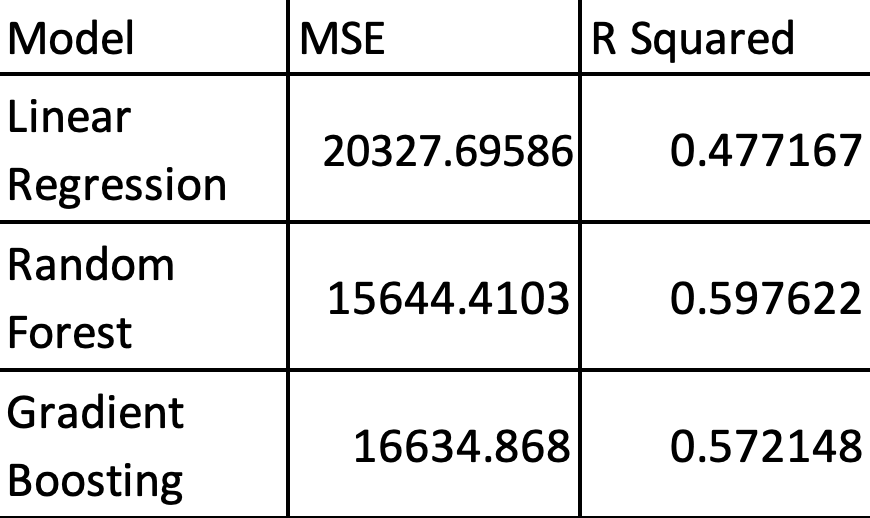

In [29]:
SNM = Image.open('../plots/SN models.png')
SNM

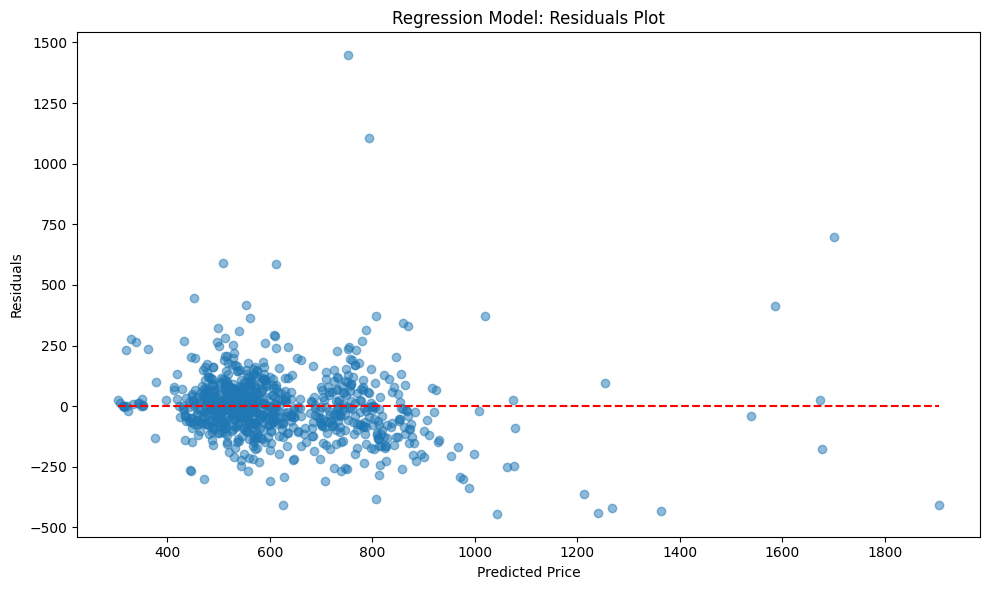

In [30]:
residual = Image.open('../plots/residual.png')
residual

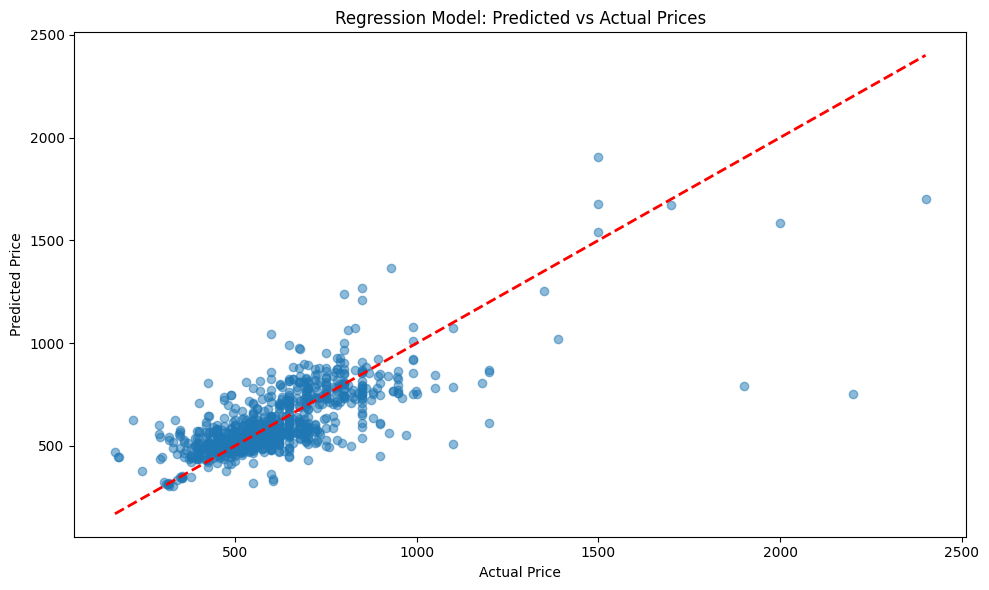

In [31]:
predictvsactual = Image.open('../plots/predict vs actual.png')
predictvsactual

# Findings

## Top 10 suburbs with the highest predicted growth rate

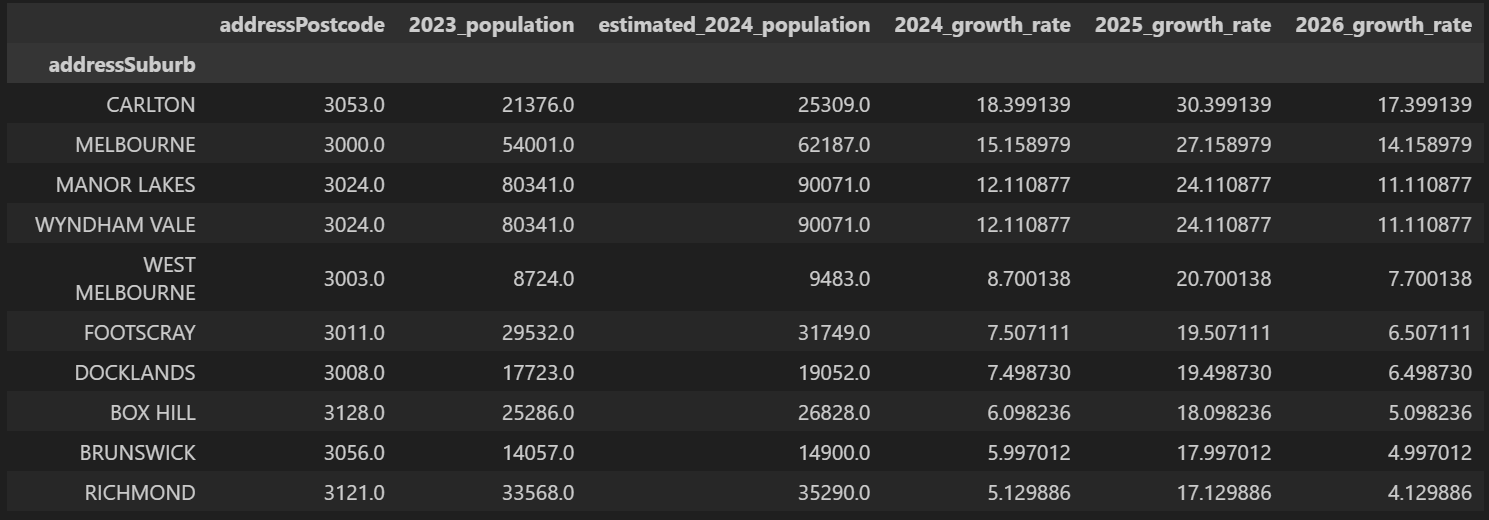

In [32]:
Tablegrowthrate = Image.open('../plots/Table growth rate.png')
Tablegrowthrate

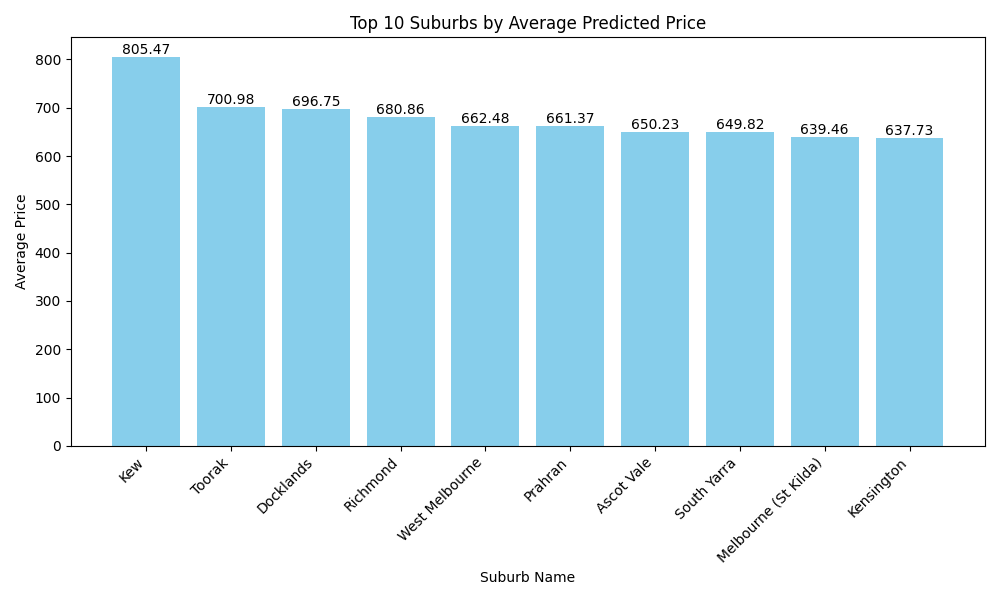

In [33]:
top10_suburbs_avg_price = Image.open('../plots/top10_suburbs_avg_price.png')
top10_suburbs_avg_price

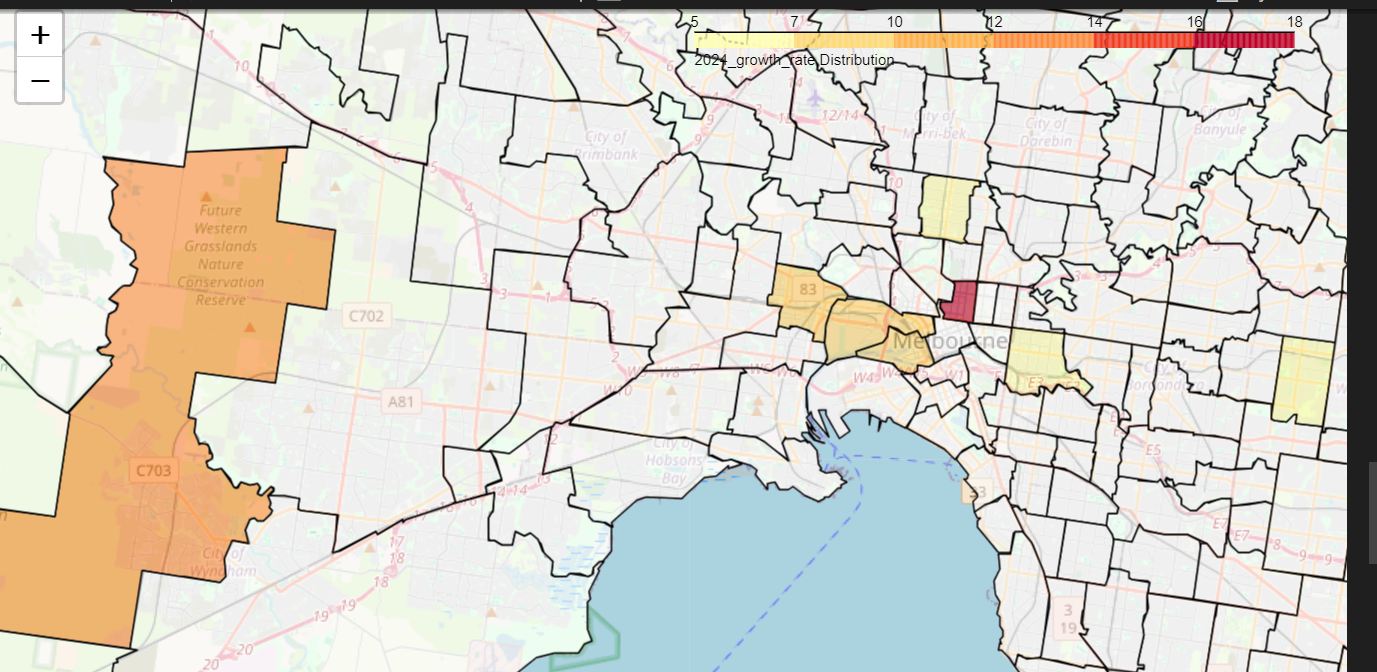

In [34]:
growthrategeo = Image.open('../plots/growth rate geo.png')
growthrategeo

## The most livable and affordable suburbs


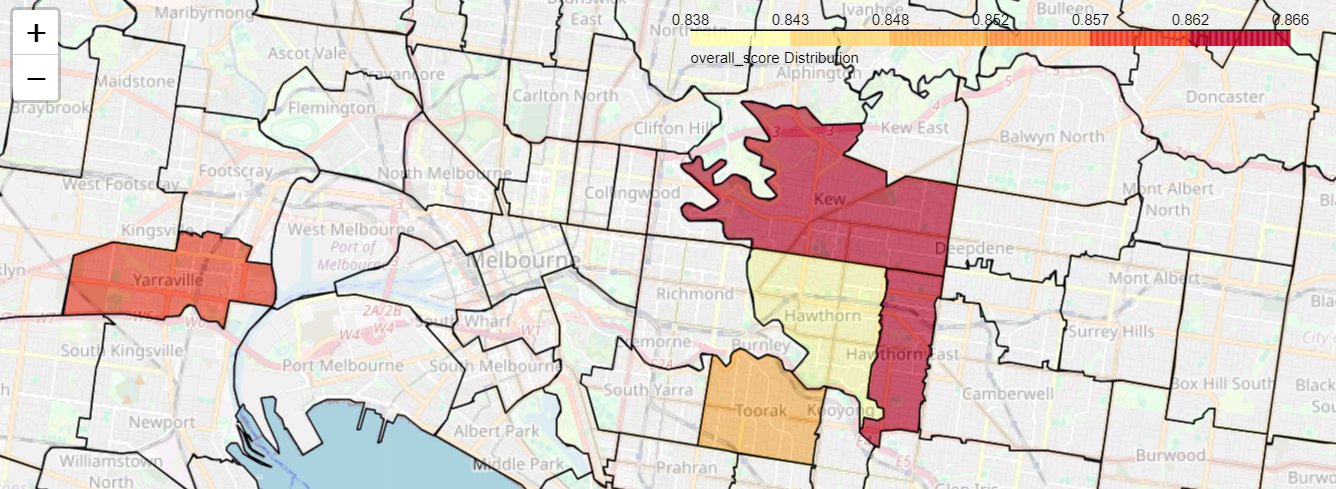

In [35]:
LiveableGeo = Image.open('../plots/Liveable Geo.png')
LiveableGeo

We assessed the regions using eight different factors. A radar chart is an effective tool for providing a comprehensive view of multivariate data. The final ranking of performance was determined by the area covered in the radar plot.

### Top1 KEW

KEW scores high on Distance to School and Distance to Mall.

It performs relatively lower in IER Score and Price, suggesting these may be weaker points for the region.

KEW also performs moderately well in terms of Medical Institution Count and Distance to Park.

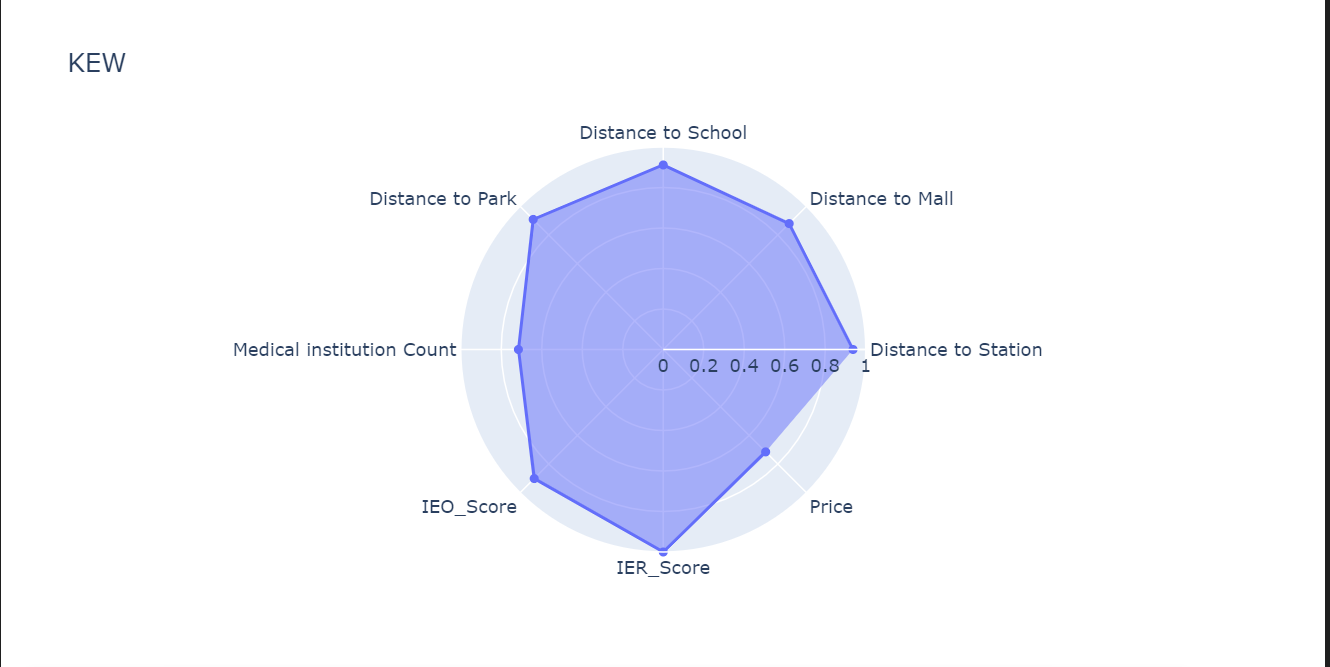

In [36]:
kew = Image.open('../plots/kew.png')
kew

### Top2 Hawthorn East

Distance to School and Distance to Mall are high-performing factors for HAWTHORN EAST, similar to the "KEW".

Distance to Station is another strength, showing proximity to public transportation.

However, IER Score and Price are relatively low, indicating that this area might not rank well in these categories.

IEO Score and Medical Institution Count are moderate, suggesting average performance in these aspects.

Distance to Park is also high, showing close proximity to recreational areas.

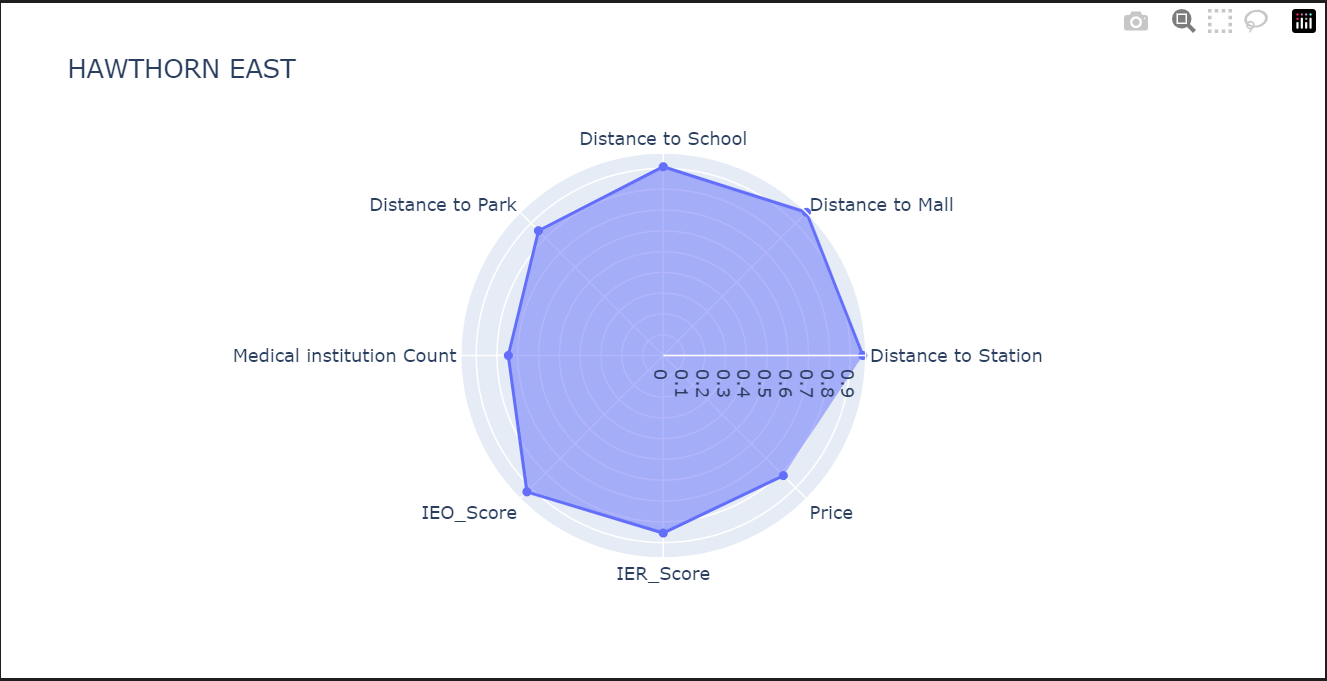

In [37]:
HawthornEast = Image.open('../plots/Hawthorn East.png')
HawthornEast

### Top3 Yarraville

Distance to School, Distance to Mall, and Distance to Park are all high-performing factors, indicating that YARRAVILLE has strong proximity to these key amenities.

Distance to Station is slightly lower compared to other factors, suggesting that public transportation access might not be as convenient.

Price and IER Score are moderate to low, which might indicate less affordability or higher costs in terms of rental prices or investment.

IEO Score is the lowest among the factors, suggesting lower performance in economic or infrastructure opportunities.

Medical Institution Count is moderate, suggesting a fair availability of healthcare services.


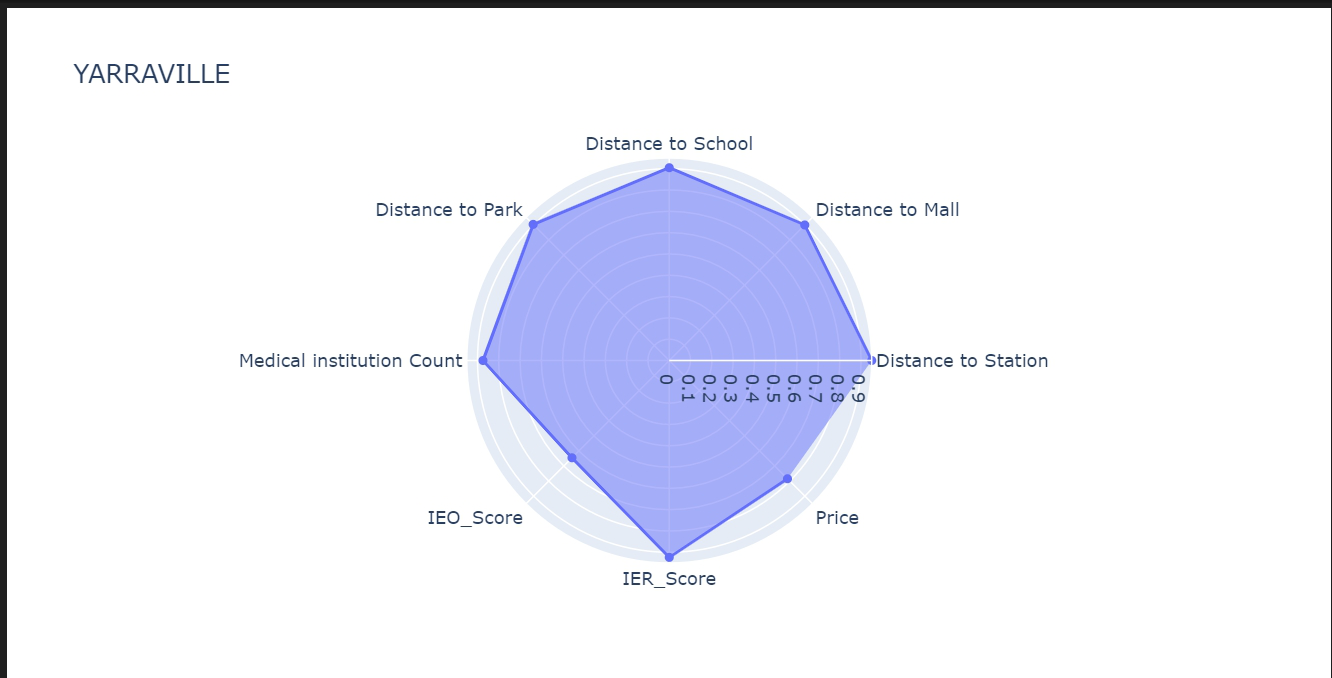

In [38]:
Yarraville = Image.open('../plots/Yarraville.png')
Yarraville

# Assumptions


1. Assume that  Population & IEO & IER information in 2023 is the same as that for 2024.

2. Assume the steady growth rate in future 5 years.

3. Assume that the location of each facility will remain as the same when we analysis the previous property rent and do the predictions


# Limitations & Difficulties


1. The overlap and information discrepancies between postcode and ABS SA2 Name might lead to few of misinformation.

2. The scraped data might not be representative for whole Victoria rental market.

3. The daily limitations of API.

4. Hard to get sufficient Instance and solve the Sample bias in models.